In [1]:
from gensim.models.ldamodel import LdaModel
import pandas as pd

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

from gensim.models import TfidfModel

from collections import Counter
import itertools
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

# Adidas

In [2]:
def createLDA(column_name, im_cap_tf, n_topics = 5, alpha_val = 0.5, eta_val=0.5, top_n = None):
    
    if top_n != None:
        l = []
        for i in im_cap_tf[column_name]:
            l+=i
    
        wc = Counter(l)
        wc.most_common()
        
        mc_adidas = wc.most_common()[top_n:]
        mc_adidas_list = [i[0] for i in mc_adidas]
        
        texts = im_cap_tf[column_name].apply(lambda x : list(set(x).intersection(set(mc_adidas_list))))
    
    else:
        texts = im_cap_tf[column_name]
        
    # Create a corpus from a list of texts
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # Train the model on the corpus.
    lda = LdaModel(corpus, num_topics=n_topics, alpha=alpha_val, eta = eta_val, id2word = dictionary, 
                   random_state=0, iterations=100)
    
    for p in lda.print_topics(num_topics=n_topics, num_words=10):
        print(p[1])
    
    return lda

def createLDA_TFIDF(column_name, im_cap_tf, n_topics = 5, alpha_val = 0.5, eta_val=0.5, top_n = None):
    
    if top_n != None:
        l = []
        for i in im_cap_tf[column_name]:
            l+=i
    
        wc = Counter(l)
        wc.most_common()
        
        mc_adidas = wc.most_common()[top_n:]
        mc_adidas_list = [i[0] for i in mc_adidas]
        
        texts = im_cap_tf[column_name].apply(lambda x : list(set(x).intersection(set(mc_adidas_list))))
    
    else:
        texts = im_cap_tf[column_name]
        
    # Create a corpus from a list of texts
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    model = TfidfModel(corpus)  # fit model

    tfidf_corpus = model[corpus]  # apply model to the first corpus document

    # Train the model on the corpus.
    lda = LdaModel(tfidf_corpus, num_topics=n_topics, alpha=alpha_val,eta = eta_val, id2word = dictionary, 
                   random_state=0, iterations=100)
    
    for p in lda.print_topics(num_topics=n_topics, num_words=10):
        print(p[1])
    
    return lda

In [3]:
def get_word2topic(lda):
    lda_word_topic_df = pd.DataFrame(lda.get_topics()).T
    lda_word_topic_df.index = lda.id2word.values()
    return lda_word_topic_df

## Only Captions

In [ ]:
data = pd.read_csv("./Adidas/adidas_caption_tf.csv", index_col=0)
print(data.columns)
column_name = 'caption_list'
data[column_name] = data[column_name].apply(lambda x : eval(x))

In [ ]:
n_topics_l=[3, 5, 10]
alpha_val_l=[0.5, 0.7]
eta_val_l = [None, 0.5, 0.7]
top_n_l =[None, 10, 20, 30]
writer_tf = pd.ExcelWriter('adidas_topic_model_caption_tf.xlsx')
writer_tfidf = pd.ExcelWriter('adidas_topic_model_caption_tfidf.xlsx')

for n_topics, alpha_val, eta_val, top_n in itertools.product(n_topics_l, alpha_val_l, eta_val_l, top_n_l):
    print('# Topics', n_topics, 'Alpha', alpha_val, 'ETA val', eta_val, 'top_n', top_n)
    sheet_name = str(n_topics) + '_' + str(alpha_val) + '_' + str(eta_val) + '_' + str(top_n)
    
    print('\n------------------------LDA without TFIDF ----------------------- \n')
    lda_cap = createLDA(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val = eta_val, top_n=top_n)
    lda_topic_weight_tf = get_word2topic(lda_cap)
    lda_topic_weight_tf.to_excel(writer_tf, sheet_name=sheet_name+'_tf', index=True)
    
    print('\n------------------------LDA with TFIDF ----------------------- \n')
    lda_cap_tfidf = createLDA_TFIDF(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val=eta_val, top_n=top_n)
    lda_topic_weight_tfidf = get_word2topic(lda_cap_tfidf)
    lda_topic_weight_tfidf.to_excel(writer_tfidf, sheet_name=sheet_name+'_tfidf', index=True)
    
writer_tf.save() 
writer_tfidf.save() 

## Only Image Labels

In [ ]:
data = pd.read_csv("./Adidas/adidas_label_tf.csv", index_col=0)
print(data.columns)
column_name = 'labels_list'
data[column_name] = data[column_name].apply(lambda x : eval(x))

In [ ]:
n_topics_l=[3, 5, 10]
alpha_val_l=[0.5, 0.7]
eta_val_l = [None, 0.5, 0.7]
top_n_l =[None, 10, 20, 30]
writer_tf = pd.ExcelWriter('adidas_topic_model_image_tf.xlsx')
writer_tfidf = pd.ExcelWriter('adidas_topic_model_image_tfidf.xlsx')

for n_topics, alpha_val, eta_val, top_n in itertools.product(n_topics_l, alpha_val_l, eta_val_l, top_n_l):
    print('# Topics', n_topics, 'Alpha', alpha_val, 'ETA val', eta_val, 'top_n', top_n)
    sheet_name = str(n_topics) + '_' + str(alpha_val) + '_' + str(eta_val) + '_' + str(top_n)
    
    print('\n------------------------LDA without TFIDF ----------------------- \n')
    lda_cap = createLDA(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val = eta_val, top_n=top_n)
    lda_topic_weight_tf = get_word2topic(lda_cap)
    lda_topic_weight_tf.to_excel(writer_tf, sheet_name=sheet_name+'_tf', index=True)
    
    print('\n------------------------LDA with TFIDF ----------------------- \n')
    lda_cap_tfidf = createLDA_TFIDF(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val=eta_val, top_n=top_n)
    lda_topic_weight_tfidf = get_word2topic(lda_cap_tfidf)
    lda_topic_weight_tfidf.to_excel(writer_tfidf, sheet_name=sheet_name+'_tfidf', index=True)
    
writer_tf.save() 
writer_tfidf.save() 

## Image Labels + Caption

In [ ]:
data = pd.read_csv("./Adidas/adidas_img_cap_tf.csv", index_col=0)
print(data.columns)
column_name = 'img_cap_list'
data[column_name] = data[column_name].apply(lambda x : eval(x))

In [ ]:
n_topics_l=[3, 5, 10]
alpha_val_l=[0.5, 0.7]
eta_val_l = [None, 0.5, 0.7]
top_n_l =[None, 10, 20, 30]
writer_tf = pd.ExcelWriter('adidas_topic_model_imgcap_tf.xlsx')
writer_tfidf = pd.ExcelWriter('adidas_topic_model_imgcap_tfidf.xlsx')

for n_topics, alpha_val, eta_val, top_n in itertools.product(n_topics_l, alpha_val_l, eta_val_l, top_n_l):
    print('# Topics', n_topics, 'Alpha', alpha_val, 'ETA val', eta_val, 'top_n', top_n)
    sheet_name = str(n_topics) + '_' + str(alpha_val) + '_' + str(eta_val) + '_' + str(top_n)
    
    print('\n------------------------LDA without TFIDF ----------------------- \n')
    lda_cap = createLDA(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val = eta_val, top_n=top_n)
    lda_topic_weight_tf = get_word2topic(lda_cap)
    lda_topic_weight_tf.to_excel(writer_tf, sheet_name=sheet_name+'_tf', index=True)
    
    print('\n------------------------LDA with TFIDF ----------------------- \n')
    lda_cap_tfidf = createLDA_TFIDF(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val=eta_val, top_n=top_n)
    lda_topic_weight_tfidf = get_word2topic(lda_cap_tfidf)
    lda_topic_weight_tfidf.to_excel(writer_tfidf, sheet_name=sheet_name+'_tfidf', index=True)
    
writer_tf.save() 
writer_tfidf.save() 

# Nike

## Only Captions

In [ ]:
data = pd.read_csv("./Nike/nike_caption_tf.csv", index_col=0)
print(data.columns)
column_name = 'caption_list'
data[column_name] = data[column_name].apply(lambda x : eval(x))

In [ ]:
n_topics_l=[3, 5, 10]
alpha_val_l=[0.5, 0.7]
eta_val_l = [None, 0.5, 0.7]
top_n_l =[None, 10, 20, 30]
writer_tf = pd.ExcelWriter('nike_topic_model_caption_tf.xlsx')
writer_tfidf = pd.ExcelWriter('nike_topic_model_caption_tfidf.xlsx')

for n_topics, alpha_val, eta_val, top_n in itertools.product(n_topics_l, alpha_val_l, eta_val_l, top_n_l):
    print('# Topics', n_topics, 'Alpha', alpha_val, 'ETA val', eta_val, 'top_n', top_n)
    sheet_name = str(n_topics) + '_' + str(alpha_val) + '_' + str(eta_val) + '_' + str(top_n)
    
    print('\n------------------------LDA without TFIDF ----------------------- \n')
    lda_cap = createLDA(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val = eta_val, top_n=top_n)
    lda_topic_weight_tf = get_word2topic(lda_cap)
    lda_topic_weight_tf.to_excel(writer_tf, sheet_name=sheet_name+'_tf', index=True)
    
    print('\n------------------------LDA with TFIDF ----------------------- \n')
    lda_cap_tfidf = createLDA_TFIDF(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val=eta_val, top_n=top_n)
    lda_topic_weight_tfidf = get_word2topic(lda_cap_tfidf)
    lda_topic_weight_tfidf.to_excel(writer_tfidf, sheet_name=sheet_name+'_tfidf', index=True)
    
writer_tf.save() 
writer_tfidf.save() 

## Only Image Labels

In [ ]:
data = pd.read_csv("./Nike/nike_label_tf.csv", index_col=0)
print(data.columns)
column_name = 'labels_list'
data[column_name] = data[column_name].apply(lambda x : eval(x))

In [ ]:
n_topics_l=[3, 5, 10]
alpha_val_l=[0.5, 0.7]
eta_val_l = [None, 0.5, 0.7]
top_n_l =[None, 10, 20, 30]
writer_tf = pd.ExcelWriter('nike_topic_model_image_tf.xlsx')
writer_tfidf = pd.ExcelWriter('nike_topic_model_image_tfidf.xlsx')

for n_topics, alpha_val, eta_val, top_n in itertools.product(n_topics_l, alpha_val_l, eta_val_l, top_n_l):
    print('# Topics', n_topics, 'Alpha', alpha_val, 'ETA val', eta_val, 'top_n', top_n)
    sheet_name = str(n_topics) + '_' + str(alpha_val) + '_' + str(eta_val) + '_' + str(top_n)
    
    print('\n------------------------LDA without TFIDF ----------------------- \n')
    lda_cap = createLDA(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val = eta_val, top_n=top_n)
    lda_topic_weight_tf = get_word2topic(lda_cap)
    lda_topic_weight_tf.to_excel(writer_tf, sheet_name=sheet_name+'_tf', index=True)
    
    print('\n------------------------LDA with TFIDF ----------------------- \n')
    lda_cap_tfidf = createLDA_TFIDF(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val=eta_val, top_n=top_n)
    lda_topic_weight_tfidf = get_word2topic(lda_cap_tfidf)
    lda_topic_weight_tfidf.to_excel(writer_tfidf, sheet_name=sheet_name+'_tfidf', index=True)
    
writer_tf.save() 
writer_tfidf.save() 

## Image Labels + Caption

In [ ]:
data = pd.read_csv("./Nike/nike_img_cap_tf.csv", index_col=0)
print(data.columns)
column_name = 'img_cap_list'
data[column_name] = data[column_name].apply(lambda x : eval(x))

In [ ]:
n_topics_l=[3, 5, 10]
alpha_val_l=[0.5, 0.7]
eta_val_l = [None, 0.5, 0.7]
top_n_l =[None, 10, 20, 30]
writer_tf = pd.ExcelWriter('nike_topic_model_imgcap_tf.xlsx')
writer_tfidf = pd.ExcelWriter('nike_topic_model_imgcap_tfidf.xlsx')

for n_topics, alpha_val, eta_val, top_n in itertools.product(n_topics_l, alpha_val_l, eta_val_l, top_n_l):
    print('# Topics', n_topics, 'Alpha', alpha_val, 'ETA val', eta_val, 'top_n', top_n)
    sheet_name = str(n_topics) + '_' + str(alpha_val) + '_' + str(eta_val) + '_' + str(top_n)
    
    print('\n------------------------LDA without TFIDF ----------------------- \n')
    lda_cap = createLDA(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val = eta_val, top_n=top_n)
    lda_topic_weight_tf = get_word2topic(lda_cap)
    lda_topic_weight_tf.to_excel(writer_tf, sheet_name=sheet_name+'_tf', index=True)
    
    print('\n------------------------LDA with TFIDF ----------------------- \n')
    lda_cap_tfidf = createLDA_TFIDF(column_name=column_name, im_cap_tf=data, n_topics=n_topics, alpha_val=alpha_val, eta_val=eta_val, top_n=top_n)
    lda_topic_weight_tfidf = get_word2topic(lda_cap_tfidf)
    lda_topic_weight_tfidf.to_excel(writer_tfidf, sheet_name=sheet_name+'_tfidf', index=True)
    
writer_tf.save() 
writer_tfidf.save() 

# More experimentation (trying for Nike)

In [4]:
# use just top words
nike_tf = pd.read_csv('Nike/nike_img_cap_tf.csv')
nike_tf = nike_tf.iloc[:, 1:-1]
nike_tf.head()

,really,shawnjohnsons,needle,toddantonyphoto,nosajthe,broken,fixture,tired,collect,brasileira,...,discover,universal,narrow,bowerman,corner,rise,tomckean,fencer,gomofarah,racer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
top_100words = nike_tf.sum(axis=0).sort_values(ascending=False).index[5:105]
nike_top100 = nike_tf[top_100words]
column_name = 'img_cap_list'

nike_top100[column_name] = nike_top100.apply(lambda row: str(list(row[row > 0].index)), axis=1)
print(nike_top100.head())
nike_top100[column_name] = nike_top100[column_name].apply(lambda x : eval(x))
print(nike_top100.head())

   nike  sport  people  player  nature  sportswear  football  run  gesture  \
0     0      0       0       0       0           0         0    0        0   
1     0      0       0       0       0           0         0    0        0   
2     0      0       0       0       0           0         0    0        0   
3     0      2       0       0       0           0         0    0        0   
4     0      2       1       0       0           0         0    0        0   

   world  ...  way  keep  city  move  today  know  line  tell  well  \
0      1  ...    0     0     0     0      0     0     0     0     2   
1      0  ...    0     0     0     0      0     0     0     0     0   
2      0  ...    0     0     0     0      0     0     0     0     0   
3      1  ...    0     0     0     0      0     1     0     0     0   
4      0  ...    0     0     0     0      0     2     0     1     0   

                                        img_cap_list  
0  ['world', 'and', 'art', 'time', 'first', 'mara

<ipython-input-5-ee7fe22d00e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_top100[column_name] = nike_top100.apply(lambda row: str(list(row[row > 0].index)), axis=1)
<ipython-input-5-ee7fe22d00e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nike_top100[column_name] = nike_top100[column_name].apply(lambda x : eval(x))


### Doing for 5 topic

0.036*"nike" + 0.033*"footwear" + 0.033*"plant" + 0.029*"nature" + 0.026*"people" + 0.023*"cloud" + 0.023*"tree" + 0.023*"outdoor" + 0.022*"water" + 0.020*"natural"
0.031*"gesture" + 0.031*"sport" + 0.029*"flash" + 0.029*"photography" + 0.024*"get" + 0.024*"football" + 0.024*"player" + 0.024*"cloud" + 0.024*"uniform" + 0.024*"world"
0.029*"nature" + 0.027*"happy" + 0.027*"leisure" + 0.027*"people" + 0.026*"street" + 0.022*"fashion" + 0.020*"make" + 0.019*"find" + 0.019*"sportswear" + 0.017*"event"
0.040*"sport" + 0.034*"player" + 0.031*"sportswear" + 0.030*"jersey" + 0.029*"uniform" + 0.027*"nike" + 0.026*"fashion" + 0.026*"gear" + 0.023*"football" + 0.022*"knee"
0.025*"leisure" + 0.025*"recreation" + 0.024*"happy" + 0.023*"water" + 0.022*"nike" + 0.021*"sportswear" + 0.021*"people" + 0.021*"gesture" + 0.021*"sport" + 0.021*"photography"


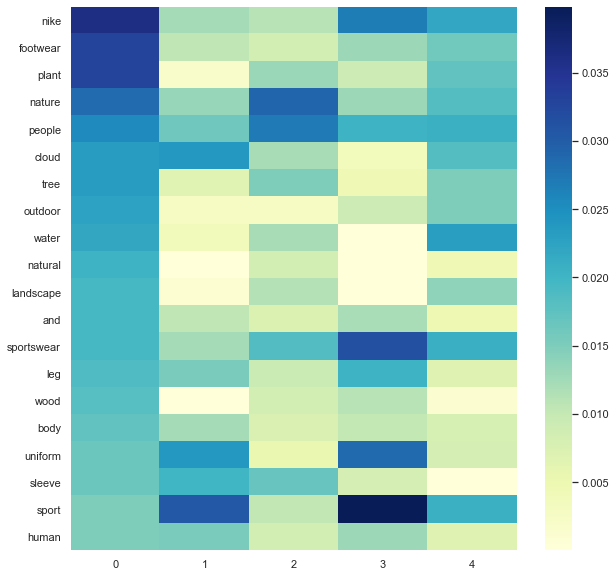

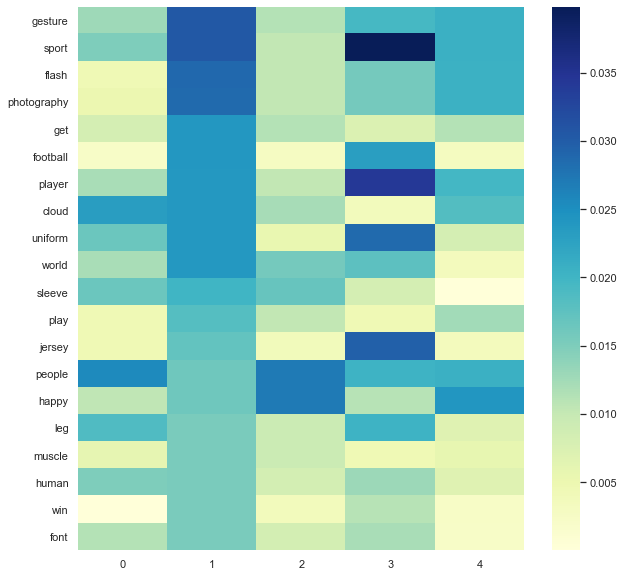

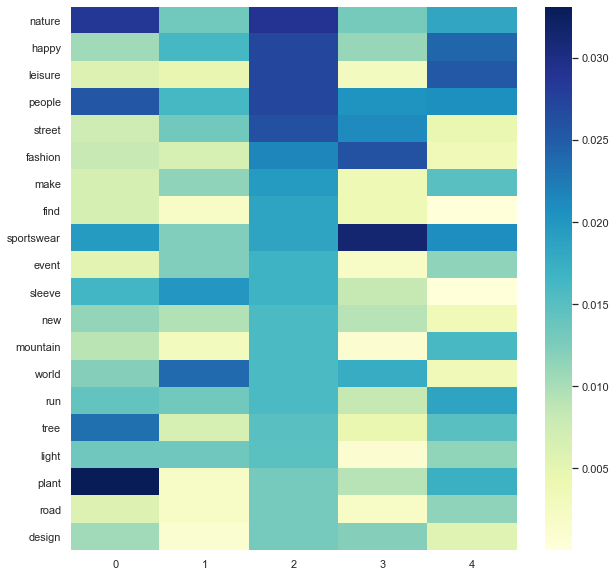

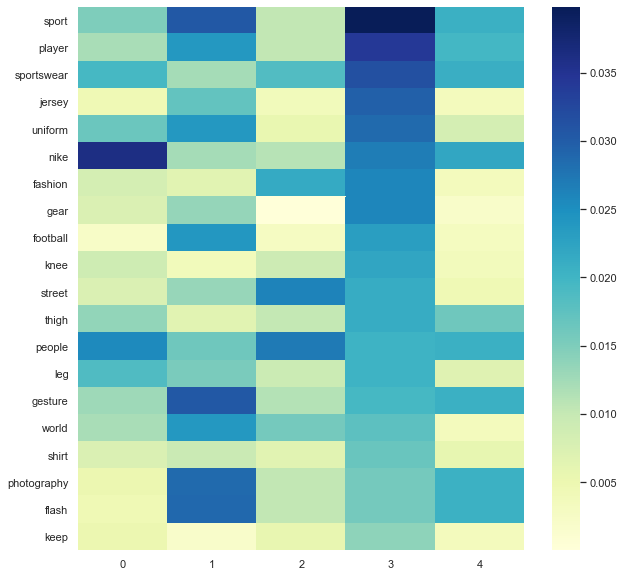

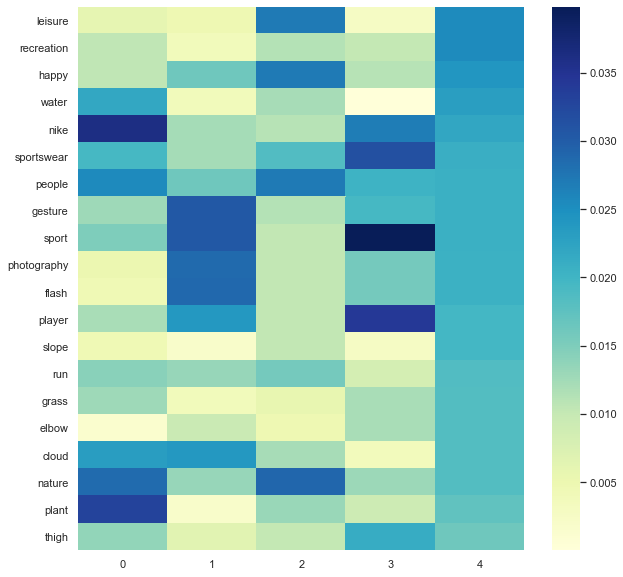

In [6]:
# lda_img_cap_top100 = createLDA(column_name=column_name, im_cap_tf=nike_top100, n_topics=5, alpha_val=0.05,
#                                eta_val = 0.01)

lda_img_cap_top100 = createLDA(column_name=column_name, im_cap_tf=nike_top100, n_topics=5, alpha_val=0.1,
                               eta_val = 0.01)

lda_img_cap_top100_word_topic = get_word2topic(lda_img_cap_top100)

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=0)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=1)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=2)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=3)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=4)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

In [7]:
lda_img_cap_top100_word_topic.columns = ['nike_brand', 'sports_photography', 'nature_people',
                                         'sports_accessories', 'outdoors']
lda_img_cap_top100_word_topic.to_csv('Nike/nike_final_word2topic.csv')

### Doing for 3 topic

In [ ]:
lda_img_cap_top100 = createLDA(column_name=column_name, im_cap_tf=nike_top100, n_topics=3, alpha_val=0.1,
                               eta_val = 0.05)

lda_img_cap_top100_word_topic = get_word2topic(lda_img_cap_top100)

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=0)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=1)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=2)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

### 5 topics for Nike

# More experimentation (trying for Adidas)

In [8]:
# use just top words
adidas_tf = pd.read_csv('Adidas/adidas_img_cap_tf.csv')
adidas_tf = adidas_tf.iloc[:, 1:-1]
adidas_tf.head()

,fearless,strongerforit,coding,jaque1212,concrete,leomessi,coreyrichproduction,feel,baller,unscripte,...,whatever,writer,historical,distance,without,ritaora,bookcase,eiger,argentinas,collide
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
top_100words = adidas_tf.sum(axis=0).sort_values(ascending=False).index[10:105]
adidas_top100 = adidas_tf[top_100words]
column_name = 'img_cap_list'

adidas_top100[column_name] = adidas_top100.apply(lambda row: str(list(row[row > 0].index)), axis=1)

adidas_top100[column_name] = adidas_top100[column_name].apply(lambda x : eval(x))

<ipython-input-9-105baed7d5f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adidas_top100[column_name] = adidas_top100.apply(lambda row: str(list(row[row > 0].index)), axis=1)
<ipython-input-9-105baed7d5f3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adidas_top100[column_name] = adidas_top100[column_name].apply(lambda x : eval(x))


### Doing for 5 topic

0.036*"heretocreate" + 0.033*"art" + 0.032*"gesture" + 0.030*"create" + 0.029*"uniform" + 0.026*"thigh" + 0.024*"entertainment" + 0.022*"design" + 0.022*"event" + 0.022*"neck"
0.059*"sky" + 0.037*"people" + 0.035*"nature" + 0.032*"cloud" + 0.032*"happy" + 0.025*"leg" + 0.022*"and" + 0.020*"street" + 0.020*"footwear" + 0.019*"recreation"
0.030*"arm" + 0.026*"muscle" + 0.025*"body" + 0.025*"human" + 0.025*"adidas" + 0.025*"gesture" + 0.024*"street" + 0.024*"light" + 0.023*"create" + 0.023*"shoulder"
0.047*"leg" + 0.044*"footwear" + 0.034*"street" + 0.025*"thigh" + 0.024*"outdoor" + 0.023*"knee" + 0.023*"human" + 0.023*"adidas" + 0.021*"shorts" + 0.021*"sneakers"
0.034*"uniform" + 0.030*"footwear" + 0.029*"player" + 0.026*"game" + 0.024*"thigh" + 0.023*"shirt" + 0.022*"short" + 0.022*"adidas" + 0.022*"sky" + 0.019*"outdoor"


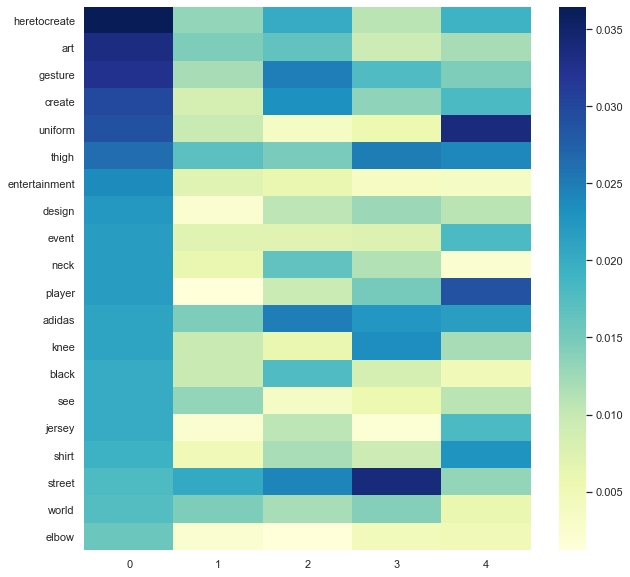

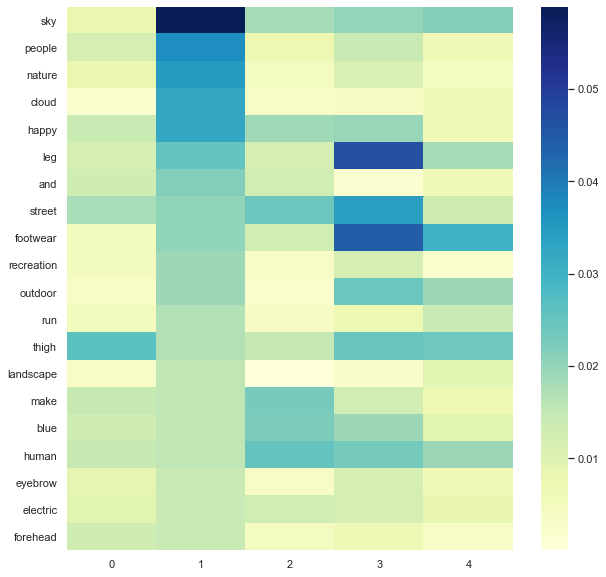

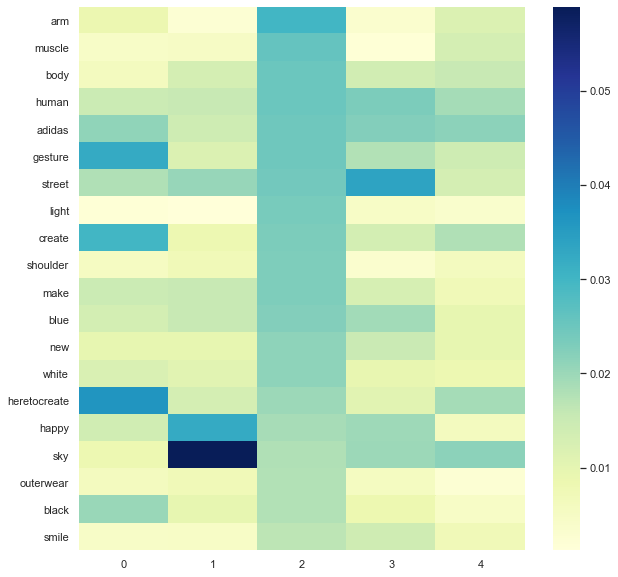

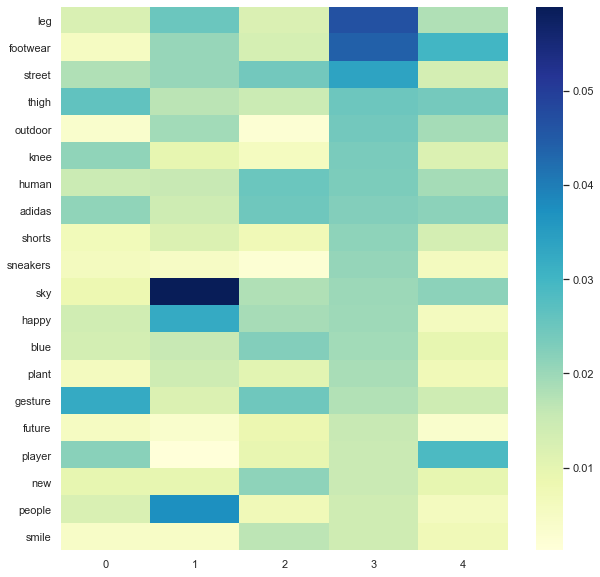

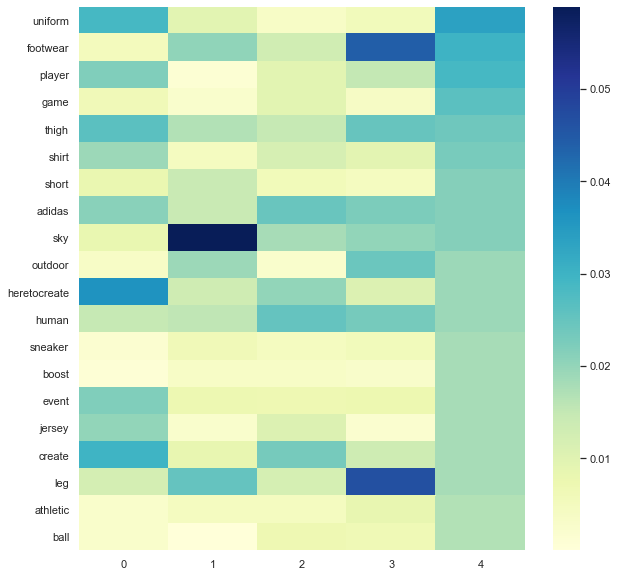

In [10]:
lda_img_cap_top100 = createLDA(column_name=column_name, im_cap_tf=adidas_top100, n_topics=5, alpha_val=0.05,
                               eta_val = 0.01)

lda_img_cap_top100_word_topic = get_word2topic(lda_img_cap_top100)

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=0)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=1)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=2)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=3)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

f, ax = plt.subplots(figsize=(10, 10))
lda_img_cap_top100_word_topic.sort_values(ascending=False, inplace=True, by=4)
ax = sns.heatmap(lda_img_cap_top100_word_topic.head(20), cmap="YlGnBu")

In [11]:
lda_img_cap_top100_word_topic.columns = ['artistic', 'nature_people', 'fitness', 'shoewear', 'sports_accessories']
lda_img_cap_top100_word_topic.to_csv('Adidas/adidas_final_word2topic.csv')